<a href="https://colab.research.google.com/github/aubrin-s/AEOP-REAP/blob/master/Day_9_15_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install

*note:
day 8 was GitHub Tutorials,
this was week 7/13-17

In [ ]:
pip install sklearn


In [ ]:
pip install quandl

In [ ]:
pip install pandas

In [ ]:
import pandas as pd 
import quandl
import math
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import numpy as np
import datetime 
import matplotlib.pyplot as plt
from matplotlib import style
import random
import pickle
from collections import Counter

# Linear Regression 1-12

## 1-2 Regression Intro

In [ ]:
import pandas as pd 
import quandl

df = quandl.get("EOD/DIS", authtoken="Dbe_ku9TBLRgTk-zbxFa")
#print(df.head())
df = df[['Adj_Open','Adj_High','Adj_Low','Adj_Close','Adj_Volume']]

df['HL_PCT']=(df['Adj_High']-df['Adj_Close'])/df['Adj_Close'] * 100.0
df['PCT_Change']=(df['Adj_Close']-df['Adj_Open'])/df['Adj_Open'] * 100.0

df = df[['Adj_Close', 'HL_PCT', 'PCT_Change', 'Adj_Volume']]
print(df.head())

            Adj_Close    HL_PCT  PCT_Change  Adj_Volume
Date                                                   
2013-09-03  55.405117  1.739701   -0.797786   7016400.0
2013-09-04  55.568796  0.180003    0.311884  14014600.0
2013-09-05  55.741567  0.489396    0.376617   6356600.0
2013-09-06  55.823406  0.716729   -0.130145   7319400.0
2013-09-09  56.005271  0.397792   -0.016234   7224500.0


## 3 Regression Features and Labels

In [ ]:
import math
forecast_col= 'Adj_Close'
df.fillna(-99999, inplace=True) #replaces na and blanks 
forecast_out = int(math.ceil(0.01*len(df))) #to get 10 days in the future

df ['label'] = df[forecast_col].shift(-forecast_out)



df.dropna(inplace=True)

print(df.head())


            Adj_Close    HL_PCT  PCT_Change  Adj_Volume      label
Date                                                              
2013-09-03  55.405117  1.739701   -0.797786   7016400.0  61.024740
2013-09-04  55.568796  0.180003    0.311884  14014600.0  59.760780
2013-09-05  55.741567  0.489396    0.376617   6356600.0  59.115160
2013-09-06  55.823406  0.716729   -0.130145   7319400.0  58.878735
2013-09-09  56.005271  0.397792   -0.016234   7224500.0  58.487726


##4 Regression Training and Testing

In [ ]:
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import numpy as np
X = np.array(df.drop(['label'],1))
y = np.array(df['label'])
X = preprocessing.scale(X)
y = np.array(df['label'])


In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2)

#clf= svm.SVR(kernel='poly') #score vector regression
clf=LinearRegression()  #(n_jobs=10)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)  #confidence level
print(accuracy)

##5 Regression forecasting and predicting




In [ ]:
df = quandl.get("EOD/DIS", authtoken="Dbe_ku9TBLRgTk-zbxFa")
#print(df.head())
df = df[['Adj_Open','Adj_High','Adj_Low','Adj_Close','Adj_Volume']]

df['HL_PCT']=(df['Adj_High']-df['Adj_Close'])/df['Adj_Close'] * 100.0
df['PCT_Change']=(df['Adj_Close']-df['Adj_Open'])/df['Adj_Open'] * 100.0

df = df[['Adj_Close', 'HL_PCT', 'PCT_Change', 'Adj_Volume']]

df ['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'],1))
X = X[:-forecast_out:]
X_lately = X[-forecast_out:]
X = preprocessing.scale(X)

df.dropna(inplace=True)

y = np.array(df['label'])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2)

clf=LinearRegression(n_jobs=10)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test) 

forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out) #gives you the next 30 days for prices

[-1739472.56599228 -3003353.12235121 -2060181.73623699 -1917058.06752665
 -3691621.31452473 -2703595.20168997 -1680718.40618469 -2059491.32604027
 -1352957.75548494 -1539007.33196359 -1683738.47995964] 0.9259802485945979 11


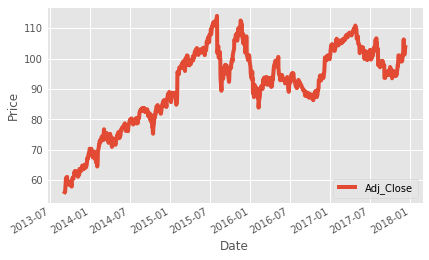

In [ ]:
import datetime 
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

df['Forecast']=np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day=86400
next_unix = last_unix + one_day

for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

df['Adj_Close'].plot()
df['Forecast']

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


##6 Pickling and Scaling

[-3553127.72803162 -6133781.68975645 -4207978.99343033 -3915750.72611269
 -7539174.02013238 -5521750.94201253 -3433187.58758964 -4206574.88484206
 -2763950.59560111 -3143866.8650632  -3439390.14375042] 0.9266720453679215 11


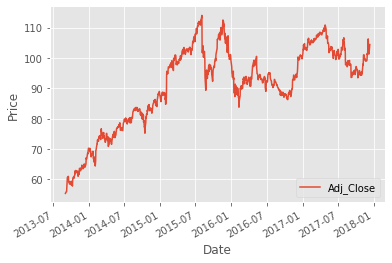

In [ ]:
import pickle

clf=LinearRegression(n_jobs=10)
clf.fit(X_train, y_train)
with open ('linearregression.pickle', 'wb') as f:
  pickle.dump(clf, f)
  pickle_in = open('linearregression.pickle', 'rb')
clf=pickle.load(pickle_in)


accuracy = clf.score(X_test,y_test) 

forecast_set = clf.predict(X_lately)
print(forecast_set, accuracy, forecast_out)


style.use('ggplot')

df['Forecast']=np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day=86400
next_unix = last_unix + one_day

for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

df['Adj_Close'].plot()
df['Forecast']

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

##7 Regression How it Works (notes, no code)

Best fit line 

*   y=mx+b

##8-9 How to program the Best Fit Slope - Finding m & b



In [ ]:
from statistics import mean
import numpy as np

xs= np.array([1,2,3,4,5,6], dtype=np.float64)
ys= np.array([5,4,6,5,6,7], dtype=np.float64)

def best_fit_slope(xs,ys):
  m = ( ((mean(xs)*mean(ys))-mean(xs*ys)) /
       ((mean(xs)**2) - mean(xs**2)))
  return m 
m=best_fit_slope(xs,ys)

print(m)

0.42857142857142866


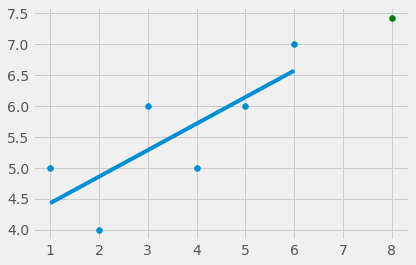

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

xs= np.array([1,2,3,4,5,6], dtype=np.float64)
ys= np.array([5,4,6,5,6,7], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
  m = ( ((mean(xs)*mean(ys))-mean(xs*ys)) /
       ((mean(xs)**2) - mean(xs**2)))
  b = mean(ys)-m*mean(xs)
  return m, b 
m,b=best_fit_slope_and_intercept(xs,ys)

#print(m,b)
regression_line= [(m*x)+b for x in xs]


predict_x = 8
predict_y = (m*predict_x)+b


plt.scatter(xs,ys)

plt.scatter(predict_x,predict_y, color='g')
plt.plot(xs, regression_line)

plt.show()

##10-11 R Squared 

0.0


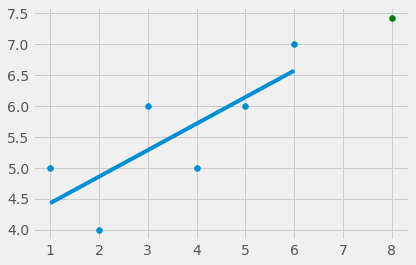

In [ ]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

xs= np.array([1,2,3,4,5,6], dtype=np.float64)
ys= np.array([5,4,6,5,6,7], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
  m = ( ((mean(xs)*mean(ys))-mean(xs*ys)) /
       ((mean(xs)**2) - mean(xs**2)))
  b = mean(ys)-m*mean(xs)
  return m, b 

def squared_error(ys_orig, ys_line):
  return sum((ys_line-ys_orig**2))

def coefficient_of_determination(ys_orig,ys_line):
  y_mean_line= [mean(ys_orig) for y in ys_orig]
  squared_error_regr = squared_error(ys_orig, ys_line)
  squared_error_y_mean = squared_error(ys_orig, y_mean_line)
  return 1 - (squared_error_regr / squared_error_y_mean)


m,b=best_fit_slope_and_intercept(xs,ys)

#print(m,b)
regression_line= [(m*x)+b for x in xs]


predict_x = 8
predict_y = (m*predict_x)+b

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

plt.scatter(xs,ys)

plt.scatter(predict_x,predict_y, color='g')
plt.plot(xs, regression_line)

plt.show()

##12 Testing Assumptions

1.1102230246251565e-16


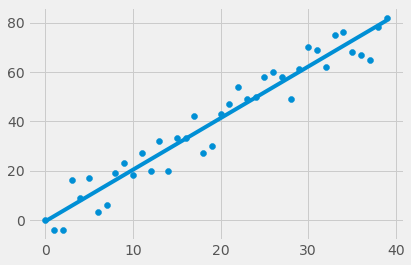

In [ ]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

style.use('fivethirtyeight')

#xs= np.array([1,2,3,4,5,6], dtype=np.float64)
#ys= np.array([5,4,6,5,6,7], dtype=np.float64)

def create_dataset(hm, varience, step=2, correlation=False):    #hm is 'how many'
  val=1
  ys=[]
  for i in range(hm):
    y= val + random.randrange(-varience, varience)
    ys.append(y)
    if correlation and correlation == 'pos':
      val+=step
    elif correlation and correlation == 'neg':
      val-=step
  xs = [i for i in range(len(ys))]
  return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)


def best_fit_slope_and_intercept(xs,ys):
  m = ( ((mean(xs)*mean(ys))-mean(xs*ys)) /
       ((mean(xs)**2) - mean(xs**2)))
  b = mean(ys)-m*mean(xs)
  return m, b 

def squared_error(ys_orig, ys_line):
  return sum((ys_line-ys_orig**2))

def coefficient_of_determination(ys_orig,ys_line):
  y_mean_line= [mean(ys_orig) for y in ys_orig]
  squared_error_regr = squared_error(ys_orig, ys_line)
  squared_error_y_mean = squared_error(ys_orig, y_mean_line)
  return 1 - (squared_error_regr / squared_error_y_mean)


xs,ys = create_dataset(40, 10, 2, correlation='pos')   #if you decrease the varience the r squared increases


m,b=best_fit_slope_and_intercept(xs,ys)

#print(m,b)
regression_line= [(m*x)+b for x in xs]


predict_x = 8
predict_y = (m*predict_x)+b

r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

plt.scatter(xs,ys)
#plt.scatter(predict_x,predict_y, color='g')
plt.plot(xs, regression_line)
plt.show()

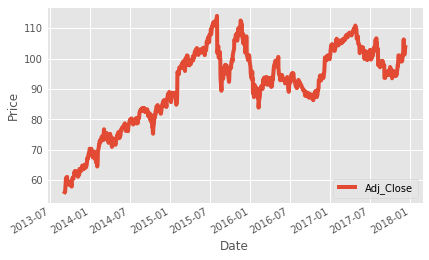

In [ ]:
df = quandl.get("EOD/DIS", authtoken="Dbe_ku9TBLRgTk-zbxFa")

df = df[['Adj_Open','Adj_High','Adj_Low','Adj_Close','Adj_Volume']]

df['HL_PCT']=(df['Adj_High']-df['Adj_Close'])/df['Adj_Close'] * 100.0
df['PCT_Change']=(df['Adj_Close']-df['Adj_Open'])/df['Adj_Open'] * 100.0

#         price          x           x              x
df = df[['Adj_Close', 'HL_PCT', 'PCT_Change', 'Adj_Volume']]

forecast_col= 'Adj_Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.01*len(df))) 

df ['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label', 'Adj_Close'],1))
X = X[:-forecast_out]
X_lately = X[-forecast_out:]
X = preprocessing.scale(X)


df.dropna(inplace=True)
y = np.array(df['label'])
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2)

clf=LinearRegression(n_jobs=10)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test) 

forecast_set = clf.predict(X_lately)
#print(forecast_set, accuracy, forecast_out)

df['Forecast']=np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day=86400
next_unix = last_unix + one_day

for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

df['Adj_Close'].plot()
df['Forecast']

plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


# K Nearest Neighbor 13-19

## 13-14 Classification w/ K Nearest Neighbors


data from https://archive.ics.uci.edu/ml/datasets.php

In [ ]:
import numpy as np
from sklearn import preprocessing, model_selection, neighbors
import pandas as pd 

df = pd.read_csv('breast-cancer-wisconsin.data')

df.columns = ['id','clump_thickness','unif_cell_size','unif_cell_shape','marg_adhesion','single_epith_cell_size',
              'bare_nuclei','bland_chrom','norm_nucleoli','mitoses','class']
df.replace('?', -99999, inplace=True)

df.drop(['id'],1,inplace=True)

X= np.array(df.drop(['class'],1))
y= np.array(df['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2)
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([4,2,1,1,1,2,3,2,1])
example_measures = example_measures.reshape(1,-1)

prediction=clf.predict(example_measures)
print(prediction)



0.9428571428571428
[2]


## 15 Euclidean Distance

In [ ]:
from math import sqrt

plot1=[1,3]
plot2=[2,5]

euclidean_distance= sqrt( (plot1[0]-plot2[0])**2 +(plot1[1]-plot2[1])**2 )
print(euclidean_distance)

2.23606797749979


##16 Creating Our K Nearest Neighbors Algorithm

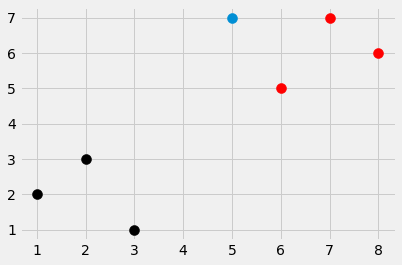

In [ ]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

dataset ={'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features=[5,7]

[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset [i]] for i in dataset]
plt.scatter(new_features[0],new_features[1], s=100)  #s means size
plt.show()


def k_nearest_neighbors(data, predict, k=3):
  if len(data) >= k:
    warnings.warn('K is not equal to value less that total voting groups')

    knnalgos
    return vote_result

##17 Writing our own K Nearest Neighbors in Code

[('r', 3)]
r


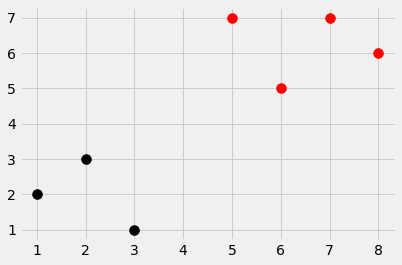

In [ ]:
def k_nearest_neighbors(data, predict, k=3):
  if len(data) >= k:
    warnings.warn('K is not equal to value less that total voting groups')
  distances= []
  for group in data:
    for features in data[group]:
      euclidean_distance= np.linalg.norm(np.array(features)-np.array(predict))
      distances.append([euclidean_distance, group])
  votes = [i[1] for i in sorted(distances)[:k]]
  print(Counter(votes).most_common(1))
  vote_result= Counter(votes).most_common(1)[0][0]
  
  return vote_result

result=k_nearest_neighbors(dataset, new_features, k=3)
print(result)

[[plt.scatter(ii[0],ii[1], s=100, color=i) for ii in dataset [i]] for i in dataset]
plt.scatter(new_features[0],new_features[1], s=100, color=result)  #now it should color match with its neighbors 
plt.show()

## 18 Applying our K Nearest Neighbors Algorithm

In [ ]:
import numpy as np
from math import sqrt
import warnings
from collections import Counter
import pandas as pd
import random

def k_nearest_neighbors(data, predict, k=3):
  if len(data) >= k:
    warnings.warn('K is not equal to value less that total voting groups')
  distances= []
  for group in data:
    for features in data[group]:
      euclidean_distance= np.linalg.norm(np.array(features)-np.array(predict))
      distances.append([euclidean_distance, group])
  votes = [i[1] for i in sorted(distances)[:k]]
  #print(Counter(votes).most_common(1))
  vote_result= Counter(votes).most_common(1)[0][0]
  
  return vote_result


df = pd.read_csv('breast-cancer-wisconsin.data')

df.columns = ['id','clump_thickness','unif_cell_size','unif_cell_shape','marg_adhesion','single_epith_cell_size',
              'bare_nuclei','bland_chrom','norm_nucleoli','mitoses','class']

df.replace('?', -99999, inplace=True)
df.drop(['id'],1,inplace=True)
full_data = df.astype(float).values.tolist()

random.shuffle(full_data)
#print(full_data[:5])

test_size= 0.2
train_set= {2:[], 4:[]} 
test_set= {2:[], 4:[]} 
train_data= full_data[:-int(test_size*len(full_data))]
test_data= full_data[-int(test_size*len(full_data)):]

for i in train_data:
  train_set[i[-1]].append(i[:1])

for i in test_data:
  test_set[i[-1]].append(i[:1])

correct=0
total=0

for group in test_set:
  for data in test_set[group]:
    vote= k_nearest_neighbors(train_set, data, k=25)
    if group == vote:
      correct += 1 
    total +=1

print('Accuracy:', correct/total)


Accuracy: 0.9064748201438849


## 19 Final thoughts on K Nearest Neighbors 

In [ ]:
def k_nearest_neighbors(data, predict, k=3):
  if len(data) >= k:
    warnings.warn('K is not equal to value less that total voting groups')
  distances= []
  for group in data:
    for features in data[group]:
      euclidean_distance= np.linalg.norm(np.array(features)-np.array(predict))
      distances.append([euclidean_distance, group])
  votes = [i[1] for i in sorted(distances)[:k]]
  vote_result= Counter(votes).most_common(1)[0][0]
  confidence= Counter(votes).most_common(1)[0][0] / k
  #print(vote_result, confidence)
  return vote_result, confidence


df = pd.read_csv('breast-cancer-wisconsin.data')
df.columns = ['id','clump_thickness','unif_cell_size','unif_cell_shape','marg_adhesion','single_epith_cell_size',
              'bare_nuclei','bland_chrom','norm_nucleoli','mitoses','class']
df.replace('?', -99999, inplace=True)
df.drop(['id'],1,inplace=True)
full_data = df.astype(float).values.tolist()

random.shuffle(full_data)

test_size= 0.4
train_set= {2:[], 4:[]} 
test_set= {2:[], 4:[]} 
train_data= full_data[:-int(test_size*len(full_data))]
test_data= full_data[-int(test_size*len(full_data)):]

for i in train_data:
  train_set[i[-1]].append(i[:1])

for i in test_data:
  test_set[i[-1]].append(i[:1])

correct=0
total=0

for group in test_set:
  for data in test_set[group]:
    vote,confidence= k_nearest_neighbors(train_set, data, k=5)
    if group == vote:
      correct += 1 
    else: 
      print(confidence)
    total +=1
print('Accuracy:', correct/total)


0.8
0.8
0.8
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
0.4
Accuracy: 0.8637992831541219


In [ ]:
accuracies = []

for i in range(25):

  df = pd.read_csv('breast-cancer-wisconsin.data')
  df.columns = ['id','clump_thickness','unif_cell_size','unif_cell_shape','marg_adhesion','single_epith_cell_size',
              'bare_nuclei','bland_chrom','norm_nucleoli','mitoses','class']
  df.replace('?', -99999, inplace=True)
  df.drop(['id'],1,inplace=True)
  full_data = df.astype(float).values.tolist()

  random.shuffle(full_data)

  test_size= 0.4
  train_set= {2:[], 4:[]} 
  test_set= {2:[], 4:[]} 
  train_data= full_data[:-int(test_size*len(full_data))]
  test_data= full_data[-int(test_size*len(full_data)):]

  for i in train_data:
    train_set[i[-1]].append(i[:1])

  for i in test_data:
    test_set[i[-1]].append(i[:1])

  correct=0
  total=0

  for group in test_set:
    for data in test_set[group]:
      vote,confidence= k_nearest_neighbors(train_set, data, k=5)
      if group == vote:
        correct += 1 
      total +=1
  #print('Accuracy:', correct/total)
  accuracies.append(correct/total)

print(sum(accuracies)/len(accuracies))

0.8193548387096774


# SVM 20-33

##20 Support Vector Machine Intro and Application (SVM)


*   finding the best seperating hyperplane to classify new data points
*   Binary classifier(the catagories can't be mixed together)



In [ ]:
import numpy as np
from sklearn import preprocessing, model_selection, neighbors, svm
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.data')
df.columns = ['id','clump_thickness','unif_cell_size','unif_cell_shape','marg_adhesion','single_epith_cell_size',
              'bare_nuclei','bland_chrom','norm_nucleoli','mitoses','class']
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)

X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

clf = svm.SVC()
clf = neighbors.KNeighborsClassifier()


clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

example_measures = np.array([[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)


0.9857142857142858
[2]


## 21-22 Understanding Vectors/Support Vector Assertion (notes, no code)
## 23-24 SVM Fundamentals and Optimization


A= [1,3]  B= [2,4]
*   direction A = [x,y]
*   magnitude- length ||A|| = sqrt(x^2 + y^2)
*   dot product = A.B = 1x2 + 3x4 (scalar value)
*   hyperplane = (w*x) + b   
*   b = bias 


optimization

*   minimize ||w||
*   maximize b 
*   to find the smallest magnitude(w) and largest b

constraint 

*   yi(xi*w + b) >= 1
*   w = vector
*   in python : class(KnownFeatures.w+b) >= 1 

convex problem (bowl shape)




##25 Creating an SVM from scratch

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style 
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # aka train
    def fit(self, data):
        pass

    def predict(self,features):
        # sign( x.w+b )       dot product                 we dont have these yet, thats what def fit is for
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)

        return classification

data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}


##26 SVM Training

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
#       each time it takes a step in the "bowl"
        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]
        
        # extremely expensive
        b_range_multiple = 5
        # 
        b_multiple = 5
        latest_optimum = self.max_feature_value*10

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                pass
            
    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)

        return classification
        


data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

##27 SVM Optimization

           

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,]

        
        
        # extremely expensive
        b_range_multiple = 5
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10

        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])   #sorted list of magnitudes
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        return classification
        
        
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

##28 Completing SVM from Scratch

Optimized a step.
Optimized a step.
Optimized a step.
[1 7] : 1.271999999999435
[2 8] : 1.271999999999435
[3 8] : 1.0399999999995864
[5 1] : 1.0479999999990506
[ 6 -1] : 1.7439999999985962
[7 3] : 1.0479999999990506


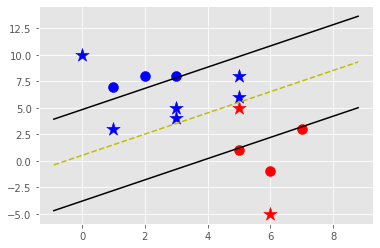

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

class Support_Vector_Machine:
    def __init__(self, visualization=True):
        self.visualization = visualization
        self.colors = {1:'r',-1:'b'}
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1)
    # train
    def fit(self, data):
        self.data = data
        # { ||w||: [w,b] }
        opt_dict = {}

        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]

        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)

        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None

        # support vectors yi(xi.w+b) = 1
        

        step_sizes = [self.max_feature_value * 0.1,
                      self.max_feature_value * 0.01,
                      # point of expense:
                      self.max_feature_value * 0.001,
                      ]

        
        
        # extremely expensive
        b_range_multiple = 2
        # we dont need to take as small of steps
        # with b as we do w
        b_multiple = 5
        latest_optimum = self.max_feature_value*10
        
        for step in step_sizes:
            w = np.array([latest_optimum,latest_optimum])
            # we can do this because convex
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple,
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit
                        # yi(xi.w+b) >= 1
                        # 
                        # #### add a break here later..
                        for i in self.data:
                            for xi in self.data[i]:
                                yi=i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    #print(xi,':',yi*(np.dot(w_t,xi)+b))
                                    
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t,b]

                if w[0] < 0:
                    optimized = True
                    print('Optimized a step.')
                else:
                    w = w - step

            norms = sorted([n for n in opt_dict])
            #||w|| : [w,b]
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2
            
        for i in self.data:
            for xi in self.data[i]:
                yi=i
                print(xi,':',yi*(np.dot(self.w,xi)+self.b))            

    def predict(self,features):
        # sign( x.w+b )
        classification = np.sign(np.dot(np.array(features),self.w)+self.b)
        if classification !=0 and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        return classification

    def visualize(self):
        [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]

        # hyperplane = x.w+b
        # v = x.w+b
        # psv = 1
        # nsv = -1
        # dec = 0
        def hyperplane(x,w,b,v):
            return (-w[0]*x-b+v) / w[1]

        datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
        hyp_x_min = datarange[0]
        hyp_x_max = datarange[1]

        # (w.x+b) = 1
        # positive support vector hyperplane
        psv1 = hyperplane(hyp_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hyp_x_max, self.w, self.b, 1)
        self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')  #k is for black color

        # (w.x+b) = -1
        # negative support vector hyperplane
        nsv1 = hyperplane(hyp_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hyp_x_max, self.w, self.b, -1)
        self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

        # (w.x+b) = 0
        # positive support vector hyperplane
        db1 = hyperplane(hyp_x_min, self.w, self.b, 0)
        db2 = hyperplane(hyp_x_max, self.w, self.b, 0)
        self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--') #yellow dashed line

        plt.show()
        
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8]]

for p in predict_us:
    svm.predict(p)

svm.visualize()

##29-30 Kernels Introduction/Why Kernels (Just concepts, no code)

*   (allows you to have more dimensions)
*   uses inner product(aka dot product)

##31-32 Soft Margin SVM and Kernels with CVXOPT

     pcost       dcost       gap    pres   dres
 0:  1.2743e+05 -1.1212e+08  3e+08  7e-01  6e-12
 1:  4.0982e+05 -2.9105e+07  5e+07  8e-02  1e-11
 2:  4.5825e+05 -5.5097e+06  8e+06  1e-02  4e-12
 3:  1.9412e+05 -1.4100e+06  2e+06  2e-03  2e-12
 4:  1.6840e+04 -2.0167e+05  2e+05  1e-12  2e-12
 5: -5.7195e+03 -3.2552e+04  3e+04  1e-12  2e-12
 6: -6.9864e+03 -2.1491e+04  1e+04  1e-12  2e-12
 7: -7.4814e+03 -1.4122e+04  7e+03  1e-12  2e-12
 8: -8.0938e+03 -1.4619e+04  7e+03  4e-13  2e-12
 9: -7.6967e+03 -1.3715e+04  6e+03  2e-12  2e-12
10: -9.2144e+03 -1.2489e+04  3e+03  5e-14  3e-12
11: -9.0195e+03 -1.2269e+04  3e+03  6e-13  3e-12
12: -9.3033e+03 -1.1460e+04  2e+03  3e-12  2e-12
13: -9.7094e+03 -1.0412e+04  7e+02  6e-13  2e-12
14: -9.9325e+03 -9.9597e+03  3e+01  9e-13  3e-12
15: -9.9439e+03 -9.9442e+03  4e-01  1e-12  3e-12
16: -9.9440e+03 -9.9440e+03  4e-03  4e-13  3e-12
Optimal solution found.
19 support vectors out of 180 points
20 out of 20 predictions correct


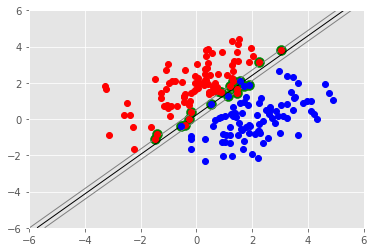

In [ ]:
import numpy as np
from numpy import linalg
import cvxopt
import cvxopt.solvers
             
def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

class SVM(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print("%d support vectors out of %d points" % (len(self.a), n_samples))

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

if __name__ == "__main__":
    import pylab as pl

    def gen_lin_separable_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[0.8, 0.6], [0.6, 0.8]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_non_lin_separable_data():
        mean1 = [-1, 2]
        mean2 = [1, -1]
        mean3 = [4, -4]
        mean4 = [-4, 4]
        cov = [[1.0,0.8], [0.8, 1.0]]
        X1 = np.random.multivariate_normal(mean1, cov, 50)
        X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 50)))
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 50)
        X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 50)))
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_lin_separable_overlap_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[1.5, 1.0], [1.0, 1.5]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def split_train(X1, y1, X2, y2):
        X1_train = X1[:90]
        y1_train = y1[:90]
        X2_train = X2[:90]
        y2_train = y2[:90]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train

    def split_test(X1, y1, X2, y2):
        X1_test = X1[90:]
        y1_test = y1[90:]
        X2_test = X2[90:]
        y2_test = y2[90:]
        X_test = np.vstack((X1_test, X2_test))
        y_test = np.hstack((y1_test, y2_test))
        return X_test, y_test

    def plot_margin(X1_train, X2_train, clf):
        def f(x, w, b, c=0):
            # given x, return y such that [x,y] in on the line
            # w.x + b = c
            return (-w[0] * x - b + c) / w[1]

        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        # w.x + b = 0
        a0 = -4; a1 = f(a0, clf.w, clf.b)
        b0 = 4; b1 = f(b0, clf.w, clf.b)
        pl.plot([a0,b0], [a1,b1], "k")

        # w.x + b = 1
        a0 = -4; a1 = f(a0, clf.w, clf.b, 1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, 1)
        pl.plot([a0,b0], [a1,b1], "k--")

        # w.x + b = -1
        a0 = -4; a1 = f(a0, clf.w, clf.b, -1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, -1)
        pl.plot([a0,b0], [a1,b1], "k--")

        pl.axis("tight")
        pl.show()

    def plot_contour(X1_train, X2_train, clf):
        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        X1, X2 = np.meshgrid(np.linspace(-6,6,50), np.linspace(-6,6,50))
        X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
        Z = clf.project(X).reshape(X1.shape)
        pl.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

        pl.axis("tight")
        pl.show()

    def test_linear():
        X1, y1, X2, y2 = gen_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM()
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_margin(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_non_linear():
        X1, y1, X2, y2 = gen_non_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(polynomial_kernel)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_soft():
        X1, y1, X2, y2 = gen_lin_separable_overlap_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(C=1000.1)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print("%d out of %d predictions correct" % (correct, len(y_predict)))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

        
    #test_linear()
    #test_non_linear()
    test_soft()

##33 SVM Parameters (Just Review)

#Clustering 34-42

##34 Clustering Introduction

2 types

*   flat clustering - you tell the machine to find specific # of clusters 
*   hierarchical clustering lets the machine to determine the groupings

K- Means Algorithm - flat (Meanshift is the hierarchical one)

*   K = # of clusters
*   Centroid - center of cluster
*   Means part- find the mean of each cluster for get a new centroid 
*   Repeat until Centroid doens't move 



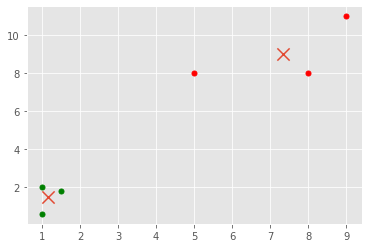

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
style.use('ggplot')


X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8],
              [8, 8],
              [1, 0.6],
              [9, 11]])


#plt.scatter(X[:, 0],X[:, 1], s=100, linewidths = 5,color='b')
#plt.show()

clf = KMeans(n_clusters=2)  #default is 8
clf.fit(X)

centroids = clf.cluster_centers_
labels = clf.labels_

colors = ["g.","r.","c.","y."]
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5)
plt.show()

##35 Handling Non-Numeric Data

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
style.use('ggplot')
from sklearn import preprocessing, model_selection
import pandas as pd

df = pd.read_excel('titanic.xls')
df.drop(['body', 'name'], 1, inplace=True)
#df.convert_objects(convert_numeric=True)
df.fillna(0, inplace=True)

def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)
print(df.head())

   pclass  survived  sex      age  ...  cabin  embarked  boat  home.dest
0       1         1    1  29.0000  ...     47         3     2         76
1       1         1    0   0.9167  ...    132         3    28        118
2       1         0    1   2.0000  ...    132         3     0        118
3       1         0    0  30.0000  ...    132         3     0        118
4       1         0    1  25.0000  ...    132         3     0        118

[5 rows x 12 columns]


##36 K Means with Titanic Dataset

In [ ]:
df = handle_non_numerical_data(df)


df.drop(['sex','boat'], 1, inplace=True)
X = np.array(df.drop(['survived'], 1).astype(float))
 #preprocessing aims to put your data in a range from -1 to +1 (making more accurate when making groups)
X = preprocessing.scale(X)   
y = np.array(df['survived'])

clf = KMeans(n_clusters=2)
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.6860198624904508


##37-38 Custom K Means/Finish Scratch

453.3333333333334
102.72108843537411


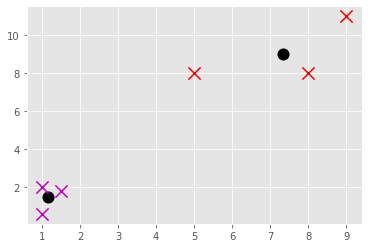

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

#plt.scatter(X[:,0], X[:,1], s=150)
#plt.show()

colors = 10*["m","r","c","b","k"]


class K_Means:   #tol=tolerance, tells if centroid not moving, max_iter=limit#of cyles
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
#Video 38:
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=50, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

453.3333333333334
102.72108843537411


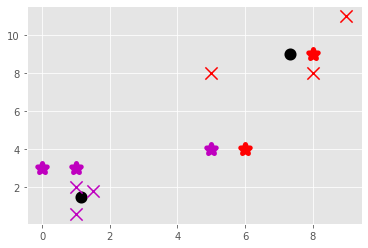

In [ ]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=50, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=100, linewidths=5)


plt.show()

##39 Mean Shift Intro



*   Radius Bandwith = circle around each point
*   Convergence= a state when you get the mean point and its isnt moving anymore



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


[[ 2.8692267   2.63388271  2.98544677]
 [ 3.4920253  10.2009895  10.08267419]]
Number of estimated clusters: 2


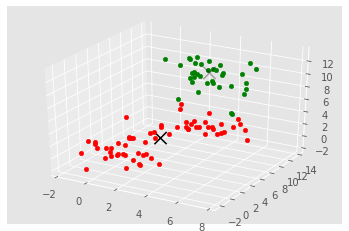

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use("ggplot")

centers = [[1,1,1],[5,5,5],[3,10,10]]

X, _ = make_blobs(n_samples = 100, centers = centers, cluster_std = 1.5)

ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

colors = 10*['r','g','b','c','k','y','m']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=colors[labels[i]], marker='o')

ax.scatter(cluster_centers[:,0],cluster_centers[:,1],cluster_centers[:,2],
            marker="x",color='k', s=150, linewidths = 5, zorder=10)

plt.show()

##40 Mean Shift with Titanic Dataset 

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, KMeans
from sklearn import preprocessing, model_selection
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('titanic.xls')

original_df = pd.DataFrame.copy(df)
df.drop(['body','name'], 1, inplace=True)
df.fillna(0,inplace=True)

def handle_non_numerical_data(df):
    
    # handling non-numerical data: must convert.
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" vlaue
            # to replace the string. 
            df[column] = list(map(convert_to_int,df[column]))

    return df

df = handle_non_numerical_data(df)
df.drop(['ticket','home.dest'], 1, inplace=True)

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

clf = MeanShift()
clf.fit(X)

labels = clf.labels_
cluster_centers = clf.cluster_centers_

original_df['cluster_group']=np.nan

for i in range(len(X)):
    original_df['cluster_group'].iloc[i] = labels[i]

#to check survival rates of each group:

n_clusters_ = len(np.unique(labels))

survival_rates = {}
for i in range(n_clusters_):
    temp_df = original_df[ (original_df['cluster_group']==float(i)) ]
    survival_cluster = temp_df[  (temp_df['survived'] == 1) ]
    survival_rate = len(survival_cluster) / len(temp_df)
    survival_rates[i] = survival_rate
    
print(survival_rates)

print(original_df[ (original_df['cluster_group']==1) ])
#change 1 to 0 or 2 
#to get just the rows from the original_df where the cluster_group column is 1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


{0: 0.37168141592920356, 1: 1.0, 2: 0.7428571428571429, 3: 0.0, 4: 0.09090909090909091, 5: 1.0}
     pclass  ...  cluster_group
35        1  ...            1.0
49        1  ...            1.0
50        1  ...            1.0
66        1  ...            1.0
183       1  ...            1.0
302       1  ...            1.0

[6 rows x 15 columns]


## 41 Mean Shift from Scratch

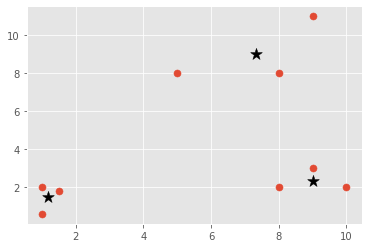

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11],
              [8,2],
              [10,2],
              [9,3],])

##plt.scatter(X[:,0], X[:,1], s=150)
##plt.show()

colors = 10*["g","r","c","b","k"]

class Mean_Shift:
    def __init__(self, radius=4):
        self.radius = radius

    def fit(self, data):
        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]
        
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))

            prev_centroids = dict(centroids)

            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                
            if optimized:
                break

        self.centroids = centroids



clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids

plt.scatter(X[:,0], X[:,1], s=50)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)

plt.show()

##42 Mean Shift Dynamic Bandwidth

0.11926036712011522
{0: array([-7.03777328, -1.84258311]), 1: array([-6.05558563,  9.02028402]), 2: array([-2.11106264,  2.71454703])}


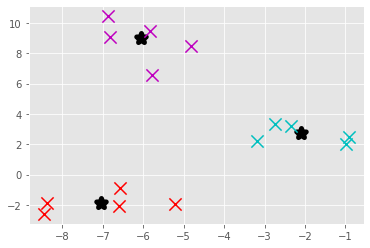

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.datasets.samples_generator import make_blobs

style.use('ggplot')

X, y = make_blobs(n_samples=15, centers=3, n_features=2)

'''
1. Start at every datapoint as a cluster center
2. take mean of radius around cluster, setting that as new cluster center
3. Repeat #2 until convergence.
'''

class Mean_Shift:
    def __init__(self, radius = None, radius_norm_step = 50):
        self.radius = radius
        self.radius_norm_step = radius_norm_step
    
    def fit(self,data):

        if self.radius == None:
            all_data_centroid = np.average(data,axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm/self.radius_norm_step
            print(self.radius)

        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]

        weights = [i for i in range(self.radius_norm_step)][::-1]    
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                
                for featureset in data:

                    distance = np.linalg.norm(featureset-centroid)
                    if distance == 0:
                        distance = 0.00000000001
                    weight_index = int(distance/self.radius)
                    if weight_index > self.radius_norm_step-1:
                        weight_index = self.radius_norm_step-1

                    to_add = (weights[weight_index]**2)*[featureset]
                    in_bandwidth +=to_add

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))

            to_pop = []

            for i in uniques:
                for ii in [i for i in uniques]:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i)-np.array(ii)) <= self.radius:
                        #print(np.array(i), np.array(ii))
                        to_pop.append(ii)
                        break

            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass

            prev_centroids = dict(centroids)
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False

            if optimized:
                break
            
        self.centroids = centroids
        self.classifications = {}

        for i in range(len(self.centroids)):
            self.classifications[i] = []
            
        for featureset in data:
            #compare distance to either centroid
            distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
            #print(distances)
            classification = (distances.index(min(distances)))

            # featureset that belongs to that cluster
            self.classifications[classification].append(featureset)


    def predict(self,data):
        #compare distance to either centroid
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = (distances.index(min(distances)))
        return classification



clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids
print(centroids)

colors = 10*['r','m','c','b','k','y']

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0],featureset[1], marker = "x", color=color, s=150, linewidths = 5, zorder = 10)

for c in centroids:
    plt.scatter(centroids[c][0],centroids[c][1], color='k', marker = "*", s=100, linewidths = 5)

plt.show()

# Deep Learning

##43 Deep Learning with Neural Networks and TensorFlow Introduction

How it works
*   input value is x by weight then added to sum
*   sum passes though the threshold function, step function
*   if you pass this, then you fire (need ti be a 1,not 0)
*   if u do fire then u become a new input value & cycle contines 


*   instead of step function, sigmoid is usually used - that's a type of activation function
*   y = function of vectors (x*w)
*   input-> hidden layer 1 then 2 -> output

why use it 

*   optimization graph is more like cosine graph, not just one parabola
*   can do it to huge data sets
*   models logic 

